In [20]:
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

LOGISTIC REGRESSION

In [21]:
# Read File
path = r'C:\Users\felipe.tufaile\Documents\GitHub\Stanford Machine Learning\Arquivos\ex2\{file}.txt'
file = 'ex2data1'
rawdata = pd.read_csv(path.format(file=file), sep=",", header=None)
rawdata = rawdata.rename(columns={0:'exam1_score', 1:'exam2_score', 2:'admittion'})

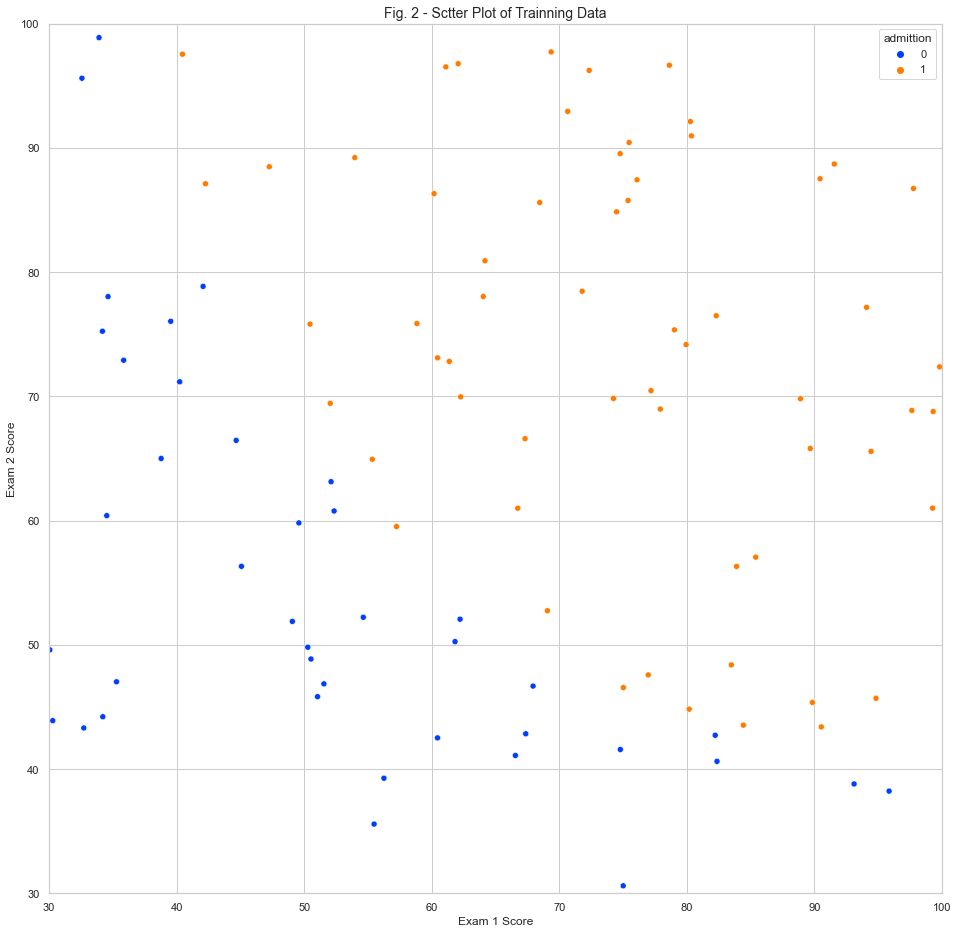

In [22]:
# Plot data
plt.figure(figsize = (16,16))
sns.set_theme(style="whitegrid")
fg01 = sns.scatterplot(data = rawdata,
                       x = 'exam1_score', 
                       y = 'exam2_score',
                       palette = 'bright',
                       hue = 'admittion',
                       markers=True)
plt.ylim(30, 100)
plt.xlim(30, 100)
plt.xlabel('Exam 1 Score', fontsize = 12)
plt.ylabel('Exam 2 Score', fontsize = 12)
plt.title('Fig. 2 - Sctter Plot of Trainning Data', fontsize = 14)                                                                                     
plt.show(fg01)

In [23]:
#
# Logistic Regression Class Definition
#
class LogisticRegressor(object):

    """
    Representation of a multivariate regressor with regularization.
    """

    import numpy as np
    import pandas as pd

    def __init__(self, ydata, xdata):
        """
        Initialize a MultivarRegressor instance, saves all parameters as attributes
        of the instance.        
        x: Features (pandas dataframe containing all independent variables for all samples)        
        y: Target (pandas dataframe containing the dependent variable for all samples)
        """
        self.xdata = xdata
        self.ydata = ydata

    def getYcolumns(self):
        """
        Returns the target column as a list.
        """
        return list(self.ydata.columns)

    def getXcolumns(self):
        """
        Returns the features columns as a list.
        """
        return list(self.xdata.columns)

    def getNumberSamples(self):
        """
        Returns the number of samples in the dataframe.
        """
        return len(self.ydata[self.getYcolumns()[0]])

    def getNumberfeatures(self):
        """
        Returns the number of features in the dataframe considering the constant term.
        """
        return len(self.getXcolumns()) + 1

    def InitY(self):
        """
        Returns a numpy vector for the target.
        """
        # Initialize target vector with ones
        y = np.ones((self.getNumberSamples(), 1))
        # Replace columns with target values
        y[:,0] = np.array(self.ydata[self.getYcolumns()[0]])
        return y

    def InitX(self):
        """
        Returns a numpy matrix for the features.
        """
        # Initialize features matrix with ones
        x = np.ones((self.getNumberSamples(), self.getNumberfeatures()))
        # Replace columns with feature values
        count_feature = 0
        for feature in self.getXcolumns():
            x[:, count_feature] = np.array(list(self.xdata[feature]))
            count_feature += 1
        return x

    def InitTheta(self):
        """
        Returns a numpy vector with zeros for theta.
        """
        return np.zeros((1, self.getNumberfeatures()))
        #return np.random.rand(1, self.getNumberfeatures())


    def GradientDescent(self, iterations, alpha, lamb):

        """
        Runs Gradient Descent using Perceptron Algorithm.
        th: the vector theta after all iterations
        j: list of the cost calculated for each iteration
        alpha: Learning rate
        lamb: Regularization term.
        itreation list.
        """

        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        # Initialize J
        j = []
        # Initialize Y
        y = self.InitY()
        # Initialize X
        x = self.InitX()
        # Initialize Theta
        th = self.InitTheta()
        # Get number of samples
        m = self.getNumberSamples()
        # Create a vector of ones
        vec_ones = np.ones((m, 1))

        e = 0.0000000001
        for it in range(iterations):
            # Calculate hypothesis function
            h = sigmoid(x@(th.T))
            # Regularization Term
            thReg = np.array([list(th[0][0:-1]) + [0]])
            # Calculate cost
            jtemp = sum(-(y.T)@np.log(np.maximum(h,e))/m - ((vec_ones -y).T)@np.log(np.maximum(vec_ones - h, e))/m)
            j.append(jtemp[0])
            # Calculate loss function
            loss = (h - y).T
            # Update Theta
            th = th - alpha*(loss@x + lamb*thReg)/m

        return (th, j)




FEATURE NORMALIZATION

Feature normalization is necessary when features differ by orders of magnitude. Performing feature scaling can make:
1 - Gradient descent converge much more quickly

A common method used to perform feature scaling is calcularing the Z-score:

Z score = (x - mu) / std

In [24]:
data = rawdata[rawdata.columns]

mu1  = data['exam1_score'].mean()
std1 = data['exam1_score'].std()

data['exam1_score'] = (data['exam1_score'] - mu1)/std1


mu2  = data['exam2_score'].mean()
std2 = data['exam2_score'].std()

data['exam2_score'] = (data['exam2_score'] - mu2)/std2

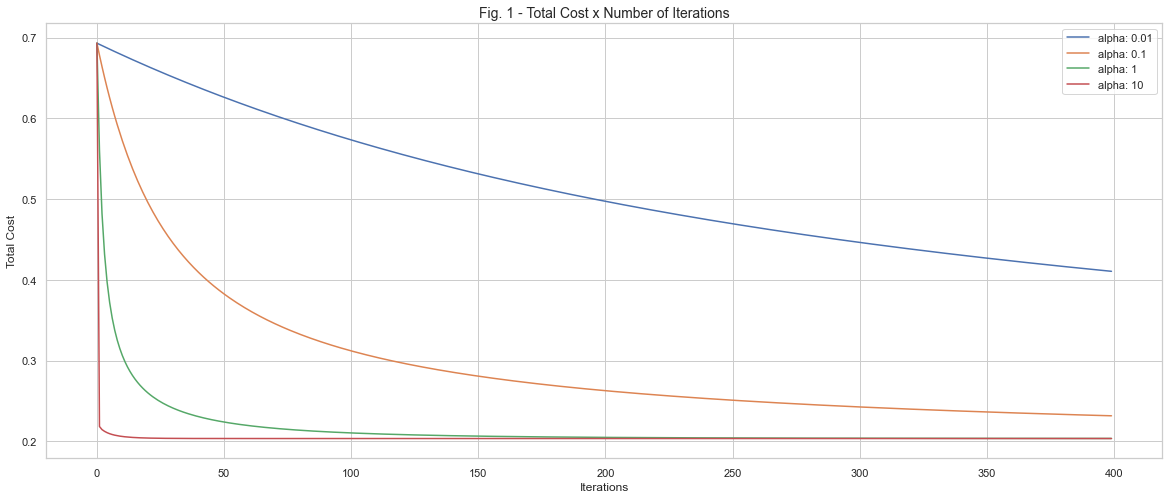

In [25]:
plt.figure(figsize = (20,8))
sns.set_theme(style="whitegrid")

Regressor = LogisticRegressor(ydata = data[['admittion']], xdata = data[['exam1_score', 'exam2_score']])

for alpha in [0.01, 0.1, 1, 10]:
    theta, cost = Regressor.GradientDescent(alpha=alpha, lamb = 0, iterations=400)

    fg01 = sns.lineplot(x = range(400), 
                        y = cost,
                        palette = 'flare',
                        markers=True,
                        label="alpha: " + str(alpha))

plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Total Cost', fontsize = 12)
plt.title('Fig. 1 - Total Cost x Number of Iterations', fontsize = 14)
plt.show(fg01)

In [26]:
theta

array([[4.01290252, 3.74390304, 1.71844948]])

In [27]:
np.array([list(theta[0][1:])])

array([[3.74390304, 1.71844948]])

In [45]:
x1pred = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
x2pred = []

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

for x1 in x1pred:
    x2 = 0
    error = 1
    while(abs(error) > 0.001):
        # The result of the sigmoid functions is the probability of a given event happen. For that matter, if we solve the following equation we will find the boundary between
        # some event happining or not happening
        error = sigmoid(theta@np.array([[(x1-mu1)/std1],[(x2-mu2)/std2],[1]])) - 0.5
        x2 += 0.0001
    print(x2)
    x2pred.append(x2)

94.15920000200222
89.04110000183232
83.92300000166242
78.80480000149251
73.6867000013226
68.5686000011527
63.4504000009828
58.3323000008129
53.214200000643
48.09600000047309
42.97790000030319
37.85980000013328
32.74159999996338
27.62349999994896
22.50539999996089


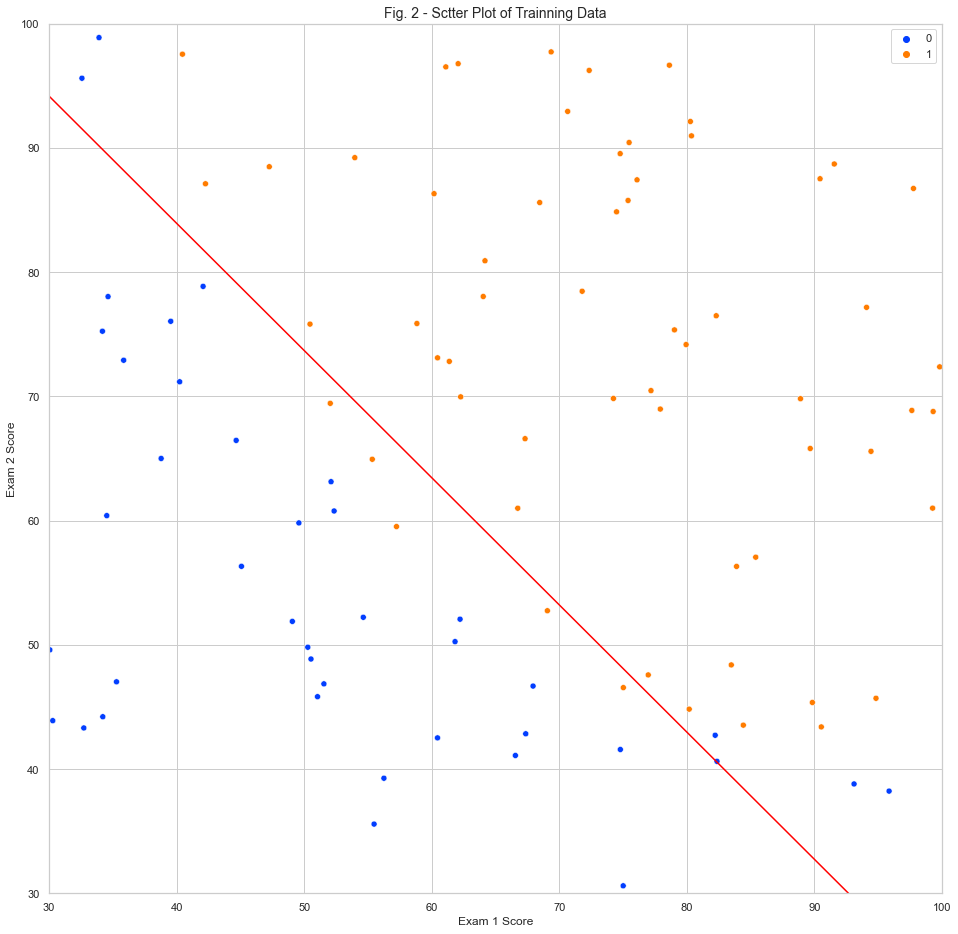

In [46]:
# Plot data
plt.figure(figsize = (16,16))
sns.set_theme(style="whitegrid")
sns.scatterplot(data = rawdata, x = 'exam1_score', y = 'exam2_score', palette = 'bright', hue = 'admittion', markers=True)
sns.lineplot(x=x1pred, y=x2pred, color='red')
plt.ylim(30, 100)
plt.xlim(30, 100)
plt.xlabel('Exam 1 Score', fontsize = 12)
plt.ylabel('Exam 2 Score', fontsize = 12)
plt.title('Fig. 2 - Sctter Plot of Trainning Data', fontsize = 14)                                                                                     
plt.show()

USING REGULARIZATION

In [105]:
# Read File
path = r'C:\Users\felipe.tufaile\Documents\GitHub\Stanford Machine Learning\Arquivos\ex2\{file}.txt'
file = 'ex2data2'
rawdata = pd.read_csv(path.format(file=file), sep=",", header=None)
rawdata = rawdata.rename(columns={0:'microship_test_1', 1:'microship_test_2', 2:'failure'})

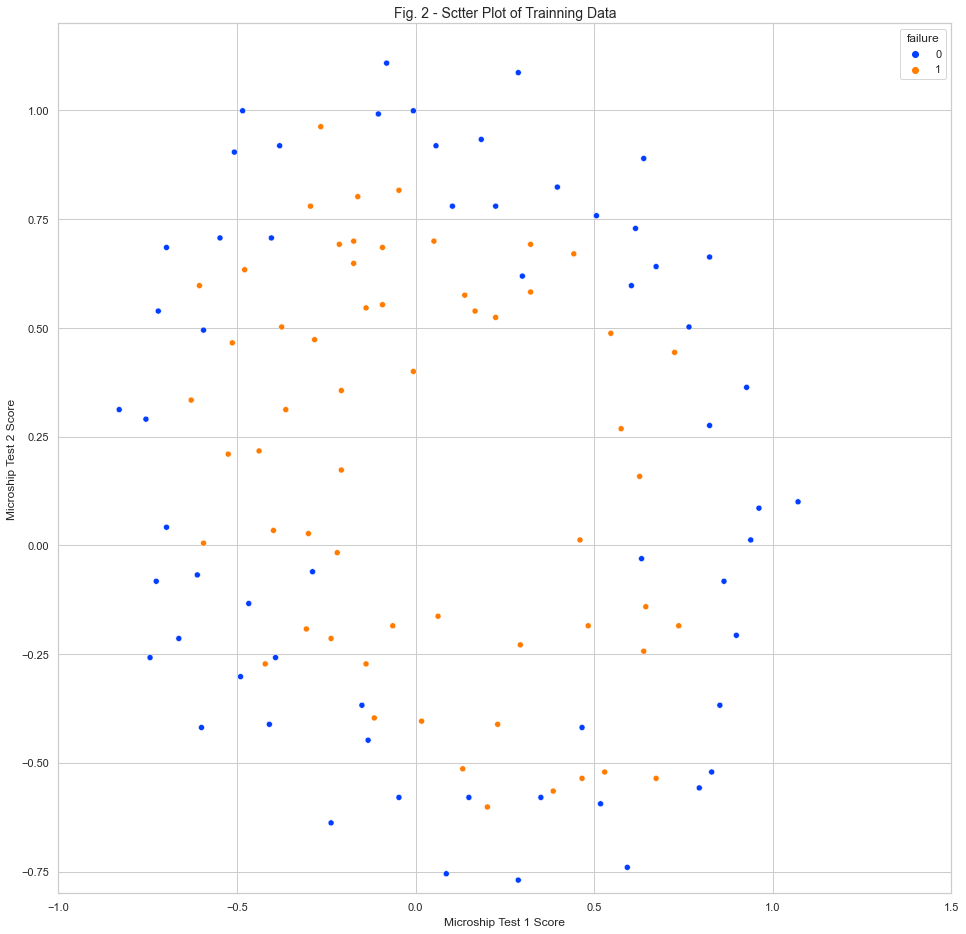

In [106]:
# Plot data
plt.figure(figsize = (16,16))
sns.set_theme(style="whitegrid")
sns.scatterplot(data = rawdata, x = 'microship_test_1', y = 'microship_test_2', palette = 'bright', hue = 'failure', markers=True)
#sns.lineplot(x=x1pred, y=x2pred, color='red')
plt.ylim(-0.8, 1.2)
plt.xlim(-1, 1.5)
plt.xlabel('Microship Test 1 Score', fontsize = 12)
plt.ylabel('Microship Test 2 Score', fontsize = 12)
plt.title('Fig. 2 - Sctter Plot of Trainning Data', fontsize = 14)                                                                                     
plt.show()

Figure 3 shows that our dataset cannot be separated into positive and
negative examples by a straight-line through the plot. Therefore, a straight-
forward application of logistic regression will not perform well on this dataset
since logistic regression will only be able to nd a linear decision boundary.

In [122]:
def mapFeature(X, degree):
# MAPFEATURE Feature mapping function to polynomial features
#
#   MAPFEATURE(X1, X2) maps the two input features
#   to quadratic features used in the regularization exercise.
#
#   Returns a new feature array with more features, comprising of 
#   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
#
#   Inputs X1, X2 must be the same size
#
    import numpy as np

    # define degree
    degree = 6
    # calculate number of terms
    ncols = int(np.math.factorial(degree + 2)/(np.math.factorial(degree)*np.math.factorial(2))-1)
    # initilize mapped matrix
    z = np.ones([X.shape[0], ncols])
    # iterate through all columns
    c=0
    for i in range(1, degree+1):
        for j in range(0, i+1):
            z[:,c] = np.multiply(X[:,0]**(i-j), X[:,1]**(j))
            c += 1

    return z

In [123]:
Regressor = LogisticRegressor(ydata = rawdata[['failure']], xdata = rawdata[['microship_test_1', 'microship_test_2']])

In [125]:
X = Regressor.InitX()
t = mapFeature(X = X, degree = 6) 